<a href="https://colab.research.google.com/github/christinezuzart/DeepLearning/blob/master/DrugReviewConditionULMFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of the Medical Condition  based on Drug Review using Transfer Learning


# Challenge Description

*   This problem is based on multi-class classification wherein medical domain dataset is provided.

*   Each sample set is the description of patient health condition or problem he/she is facing.

*   Given the description of patient's problem the model should understand it and predict about the disease or medical condition.

*  Inorder to complete this challenge, Deep Learning models with transfer learning needs to be used.


* **Evaluation Critera:**
  For the performance we will consider accuracy as **Predicted Label** / **True Label** .
  Minimum accuracy for this problem is 85%.

# Current trends

Text Classification is a classic problem in the field of Machine Learning.

There was a huge hype of transfer learning in NLP in recent times.

It started with ULMFit by Jeremy Howard et. al. from fast.ai, ELMo, GLoMo, Open AI Transformer, Google's BERT, OpenAI’s GPT-2.

These pre-trained models enhance the language modeling capabilities and eases out the problem of text classification.

# Problem Statement Understanding

Given the medical reviews of the patients symtoms and the drugs the patient is administered the model should predict the disease or the medical condition.

I tried to ponder on the application of this in real world.
May act as a virtual assist to a new bee medical practitioner who is seeing a patient suffering from a medical problem or may be a pharmacist.


# Proposed Solution & Rationale of using models and tuning parameters

This challenge insisted on using pre-trained model.

I looked for the  list of pre-trained models available. Came across this list put down beautifully by analyticsvidyha. https://www.analyticsvidhya.com/blog/2019/03/pretrained-models-get-started-nlp/

ULMFit, Google's BERT, OpenAI’s GPT-2 are the ones I plan to experiment before freezing on the best solution.

I started with ULMFit from fast.ai

Being new to NLP I started with fast.ai's course on NLP.The transfer learning lecture delivered by Jeremy Howard on the imdb dataset put things right on what are the essential building blocks to do so. This is what I referred to.

https://github.com/fastai/fastai/blob/master/examples/ULMFit.ipynb

I tried to study similiar examples using ULMFit to gather more understanding on how fine tuning is done.Stance Classification of Tweets using Transfer Learning was one example https://github.com/prrao87/tweet-stance-prediction/blob/master/ulmfit.ipynb .

My work is still in progess in terms of tuning parameters.I have used the default parameters specified above.


# Data and Preprocessing

* Input Dataset:

  Number of training examples = 161297

  Number of testing examples = 53766

* Training and Testing Dataset exploration gave good insights.

* There were examples where condition was blank.There were such examples present in both datasets.

* There were some examples where the condition was not appropriate as in the real world scenario.Its of the form where it is mentioned as "</span> users found this comment helpful."

* There were some conditions present in the Test dataset that were not present in the Training dataset.

* Some conditions had a few number of examples.

* The reviews had html text.



# Network architecture

* General-Domain Language Model Pretraining: 

  A LM is pretrained on a large general-domain corpus. 
  In ULMFit it refers to the WikiText-103 dataset. 
  This model is able to predict the next word in a sequence. 
  The model learns the general features of the language, e.g.  the sentence structure of the English language is verb or a noun.


* Target Task Language Model  Fine-Tuning: 

  The Language model in this stage is fine tuned for our target dataset i.e Drug Reviews. 
  The target dataset is of a different distribution than the WikiText-103 dataset.
  As I understand , there may be specific terms or features in this Drug Review dataset that comes from Medical domain where the language model can learn.


* Target Task Classifier:
   Our goal is to provide text classification for the reviews in our dataset.
   The pretrained LM is expanded by two linear blocks so that the final output is a probability distribution over the medical conditions.


# Incremental Innovation

# Performance measures

* For the performance we will consider accuracy as **Predicted Label** / **True Label** .

* The current model predicts 75.85% accuracy.

# Open source/Research references

https://www.fast.ai/2019/07/08/fastai-nlp/


https://www.analyticsvidhya.com/blog/2019/03/pretrained-models-get-started-nlp/

https://github.com/prrao87/tweet-stance-prediction/blob/master/ulmfit.ipynb

https://github.com/fastai/fastai/blob/master/examples/ULMFit.ipynb

https://humboldt-wi.github.io/blog/research/information_systems_1819/group4_ulmfit/

https://arxiv.org/abs/1801.06146


# Tools & Framework Used

Used the Jupyter notebook environment provided by Google Colab.
https://colab.research.google.com/

This requires no setup.


# Future work

Experimentation on Google's BERT, OpenAI’s GPT-2 pre-trained models is desired.

These would give better insights in terms of performance of the model on the given dataset

# Code

1. Mount drive inorder to read train and test csv files

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


2. Populate train and test data in dataframes

In [0]:
import pandas as pd
import io

dfTrain = pd.read_csv('/content/gdrive/My Drive/Data/drugsComTrainClean_raw.csv')
dfTest = pd.read_csv('/content/gdrive/My Drive/Data/drugsComTestClean_raw.csv') 


3. Create train and test dataframes with only two columns - labels and text

In [0]:
train_texts = dfTrain.loc[ : , 'review'].values
train_labels = dfTrain.loc[ : , 'condition'].values

test_texts = dfTest.loc[ : , 'review'].values
test_labels = dfTest.loc[ : , 'condition'].values

col_names = ['labels','text']
df_train = pd.DataFrame({'text':train_texts, 'labels':train_labels}, columns=col_names)
df_test = pd.DataFrame({'text':test_texts, 'labels':test_labels}, columns=col_names)

print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (160397, 2)
Test shape : (53495, 2)


4. Remove examples with blank condition

In [0]:
import html

df_train['text'] = df_train['text'].apply(html.unescape)
df_test['text'] = df_test['text'].apply(html.unescape)


In [0]:
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

print("Train shape :", df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (159498, 2)
Test shape : (53200, 2)


5. Process df_test to remove examples that have conditions not present in df_train.Store it in df_test_new

In [0]:
unique_train_labels_list = df_train.labels.unique()
unique_test_labels_list = df_test.labels.unique()

df_test_new = pd.DataFrame(columns=['labels','text'])

for ind in df_test.index: 
  if df_test['labels'][ind] in unique_train_labels_list :
   new_row = {'labels': df_test['labels'][ind], 'text':df_test['text'][ind]}
   df_test_new = df_test_new.append(new_row, ignore_index=True)

print("Test shape :", df_test_new.shape)

Test shape : (53161, 2)


6. Check the number of examples corresponding to a particular label in train and test dataframes

In [0]:
df_train['labels'].value_counts()
df_test_new['labels'].value_counts()

Birth Control                             9648
Depression                                3095
Pain                                      2100
Anxiety                                   1908
Acne                                      1847
                                          ... 
Hyperkalemia                                 1
amilial Cold Autoinflammatory Syndrome       1
Hypertensive Emergency                       1
Gonadotropin Inhibition                      1
Immunosuppression                            1
Name: labels, Length: 639, dtype: int64

7. Create a language model specific data bunch

In [0]:
from fastai.text import *

# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_train, valid_df=df_test_new)

8. Check how the data is encoded by fast.ai

In [0]:
data_lm.show_batch()

idx,text
0,"could hardly get out of bed , was very cranky , and slept for nearly 8 hours on a drive home from school vacation ( very unusual for him . ) i called his doctor on xxmaj monday morning and she said to stick it out a few days . xxmaj see how he did at school , and with getting up in the morning . xxmaj the last two"
1,"i have made significant improvements in my health & i no longer have the ' brain fog ' & chronic fatigue . "" xxbos "" xxmaj this pill has made my acne much worse and given me bad depression . i have noticed slight weight gain and worsening of allergies . "" xxbos "" xxmaj hi everyone . i 'm 18 and have been suffering from moderate acne for about"
2,"to eat . 3rd month . xxmaj total loss= 28 lbs . "" xxbos "" xxmaj prescribed 500 mg 3x a day for xxup bv . xxmaj day 1 i took two doses 8 hours apart . xxmaj awful , chalky taste that you ca n't get rid of . xxmaj slight dizzyness and slight headache day 1 . xxmaj day 2 woke up with the edge of a headache"
3,"this was the last hope my podiatrist had given me . xxup it xxup worked . xxmaj within 4 months toenail grew back and was fungus free for three years . xxmaj just got it back in big toe and using xxmaj xxunk gel to hopefully get rid of it again . "" xxbos "" xxmaj horrible drug . xxmaj used this for 3 weeks and had to stop ."
4,"drugs made white blood cell count go really low , i had zero energy but worst of all i felt like i had insects under my skin constantly . i failed treatment . xxmaj have n't heard any of you say you had itching or the feeling of bugs under skin so ya ! xxmaj that 's good . xxmaj good luck to all . "" xxbos "" i am"


9. Create language model learner

In [0]:
# Language model
lang_learner = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.1)

10. Search through a range of learning rates to find the optimum one for our dataset

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


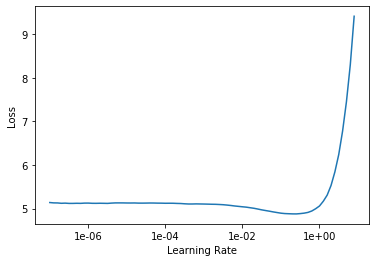

In [0]:
lang_learner.lr_find(start_lr=1e-8, end_lr=1e2)
lang_learner.recorder.plot()

11. Fine tune the language model

In [0]:
lang_learner = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
lang_learner.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))

lang_learner.unfreeze() 
lang_learner.fit_one_cycle(2, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.687714,3.532383,0.306221,11:10


epoch,train_loss,valid_loss,accuracy,time
0,3.214529,3.105346,0.359176,12:54
1,3.074212,3.002189,0.373179,12:54


12. Save the language model

In [0]:
lang_learner.save_encoder('fine_enc')

13. Create the classifier data bunch

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_df('./', train_df=df_train, valid_df=df_test_new, vocab=data_lm.train_ds.vocab, min_freq=1, bs=32)

In [0]:
# Classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_enc')
learn.freeze()

14. Search through a range of learning rates to find the optimum one for our dataset

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


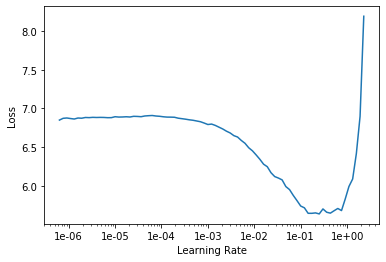

In [0]:
learn.lr_find()
learn.recorder.plot()

15. Fine tune the classifier

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_enc')

learn.freeze()
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.016586,1.720361,0.610410,04:41


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.636997,1.482186,0.658961,11:11
1,1.309534,1.247598,0.706853,10:43
2,1.211783,1.121122,0.732962,12:04


In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-4,1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.156372,1.125899,0.733602,05:12


In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-5,5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.150784,1.101882,0.740712,08:15


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.071802,1.096428,0.743346,12:00
1,1.015156,1.063712,0.750193,11:20
2,0.959877,1.044691,0.756005,10:54
3,1.031512,1.039873,0.758507,10:15


16. Loss Plot: Let us plot the loss while training the model:

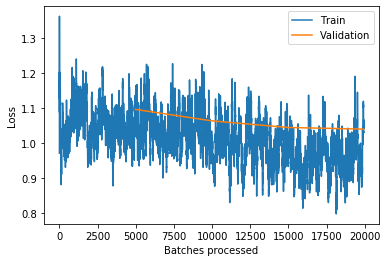

In [0]:
learn.recorder.plot_losses()

17. Export the classifier trained model

In [0]:
model_save_name = 'export1.pkl'
path = F"/content/gdrive/My Drive/{model_save_name}" 
print(path)
learn.export(path)

learn.save("trained_model", return_path=True)

/content/gdrive/My Drive/export1.pkl


PosixPath('models/trained_model.pth')

18.  Get Predictions

In [0]:
# get predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis=1)
pd.crosstab(predictions, targets)

print(f"softmax predictions: {preds}")
print(f"indexed predictions:{predictions}")
print(f"targets:{targets}")

softmax predictions: tensor([[1.1441e-04, 2.2832e-08, 4.1763e-10,  ..., 4.0215e-10, 4.9055e-07,
         4.7388e-06],
        [1.8758e-04, 1.3108e-06, 1.3524e-08,  ..., 1.2160e-08, 8.0867e-06,
         7.0163e-05],
        [2.7295e-06, 1.5056e-09, 2.9319e-11,  ..., 1.9489e-11, 3.0381e-08,
         9.2097e-08],
        ...,
        [6.6955e-04, 3.5289e-07, 4.8646e-09,  ..., 4.5196e-09, 3.5244e-06,
         2.0692e-05],
        [1.8113e-02, 8.9210e-07, 1.5182e-08,  ..., 1.3027e-08, 1.9656e-05,
         1.6466e-04],
        [2.8664e-02, 1.9385e-06, 3.9224e-08,  ..., 3.1702e-08, 5.1240e-05,
         5.2395e-04]])
indexed predictions:tensor([491, 314, 501,  ..., 189, 631, 521])
targets:tensor([491, 189, 501,  ..., 189, 252, 645])


19. Print class names

In [0]:
class_names = learn.data.classes
print(class_names)

['ADHD', 'AIDS Related Wasting', 'AV Heart Block', 'Abdominal Distension', 'Abnormal Uterine Bleeding', 'Abortion', 'Acetaminophen Overdose', 'Acne', 'Actinic Keratosis', 'Acute Coronary Syndrome', 'Acute Lymphoblastic Leukemia', 'Acute Nonlymphocytic Leukemia', 'Acute Promyelocytic Leukemia', "Addison's Disease", 'Adrenocortical Insufficiency', 'Adult Human Growth Hormone Deficiency', 'Aggressive Behavi', 'Agitated State', 'Agitation', 'Alcohol Dependence', 'Alcohol Withdrawal', 'Allergic Reactions', 'Allergic Rhinitis', 'Allergic Urticaria', 'Allergies', 'Alopecia', 'Alpha-1 Proteinase Inhibitor Deficiency', "Alzheimer's Disease", 'Amebiasis', 'Amenorrhea', 'Amyotrophic Lateral Sclerosis', 'Anal Fissure and Fistula', 'Anal Itching', 'Anaphylaxis', 'Anaplastic Astrocytoma', 'Anaplastic Oligodendroglioma', 'Androgenetic Alopecia', 'Anemia', 'Anemia Associated with Chronic Renal Failure', 'Anemia, Chemotherapy Induced', 'Anemia, Sickle Cell', 'Anesthesia', 'Anesthetic Adjunct', 'Angina'

20. Confusion Matrix

In [0]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(targets, predictions)
print(confusion_matrix)


[[1022    0    0    0 ...    0    0    0    0]
 [   1    0    0    0 ...    0    0    0    0]
 [   0    0  375    0 ...    0    0    0    0]
 [   0    0    0    0 ...    0    0    0    0]
 ...
 [   0    0    0    0 ...    0    0    0    0]
 [   0    0    0    0 ...    0    0    0    0]
 [   0    0    2    0 ...    0    0    0    0]
 [   0    0    0    0 ...    0    0    0    0]]


21. Verify predictions

In [0]:
filename = 'Confusion.csv'
path = F"/content/gdrive/My Drive/{filename}" 
pd.DataFrame(confusion_matrix).to_csv(path)

In [0]:
learn.show_results(rows=5)

text,target,prediction
"xxbos "" i do n’t find a lot of positive stories about antidepressants , or i find stories where people are taking the antidepressant the wrong way . \r \n \r \n i wanted to share my experience . a positive one . \r \n \r \n i ’ve had generalized anxiety disorder , xxup severe xxup ocd , and panic disorder for as long as i can",Obsessive Compulsive Disorde,Obsessive Compulsive Disorde
"xxbos "" • \t 19 xxmaj apr. 2016 \r\r \n \r\r \n xxmaj began initial dose at xxunk hours . xxmaj felt the medicine working within a ½ hour . xxmaj was in a good mood as i had been taken off of xxmaj warfarin this date . xxmaj before drifting off to sleep , i xxunk at the clock . xxmaj it was approx . xxunk hrs .",Depression,High Cholesterol
"xxbos "" xxmaj my personal experience with suboxone is good so far . i have been on prescribed xxmaj fentanyl xxmaj patch 25 much / 48 hrs . i have dropped to this dose over the last year . ( i also left the old patch on ) . i have been on opiates for 12 years full time prescribed . xxmaj at my highest prescription i was using 180",Opiate Dependence,Opiate Dependence
"xxbos "" xxmaj my personal experience with suboxone is good so far . i have been on prescribed xxmaj fentanyl xxmaj patch 25 much / 48 hrs . i have dropped to this dose over the last year . ( i also left the old patch on ) . i have been on opiates for 12 years full time prescribed . xxmaj at my highest prescription i was using 180",Opiate Dependence,Opiate Dependence
"xxbos "" xxmaj my colonoscopy was booked in for late afternoon on a xxmaj thursday . xxmaj the hospital said to stop eating anything from 1 pm on the xxmaj wednesday and recommended ( giving some detail ) a non fibre diet from xxmaj tuesday evening until xxmaj wednesday noon - avoiding dark drinks and jelly ( like blackcurrant flavour ) . xxmaj avoid red meat , sausages and pies",Bowel Preparation,Bowel Preparation


In [0]:
diagonal = np.diag(confusion_matrix)
true_positives = sum(diagonal)
total_test_data = np.sum(confusion_matrix, axis=1).sum()
accuracy = (true_positives /total_test_data) * 100

print("Test Accuracy Percentage:", accuracy)

Test Accuracy Percentage: 75.85071763134628
